### Noise calculations for paper revisions


This notebook explores the model training noise as requested during the first round of paper review.

We use the conda environment `analysis`


#### Define paths to model files

In [173]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/trained_models/'
model_1 = f'{root}V15_noise_expt_1/'
model_2 = f'{root}V15_noise_expt_2/'
model_3 = f'{root}V15_noise_expt_3/'
model_4 = f'{root}V15_noise_expt_4/'

#### Define some useful functions

In [61]:
import pandas as pd
def load_predictions(path):

    df = pd.read_parquet(path+'predictions.parquet')
    
    
    #Calculate some extra columns
    df['model_predicion_bias'] = df.MODIS_LST - df.predictions
    df['model_predicion_error'] = abs(df.MODIS_LST - df.predictions)
        
    df['ERA_predicion_bias'] = df.MODIS_LST - df.skt_unnormalised
    df['ERA_predicion_error'] = abs(df.MODIS_LST - df.skt_unnormalised)


    print ('----------------------------------MODEL-------------------------------------------------')
    print("Mean/Median/Std prediction bias:", df['model_predicion_bias'].mean(), df['model_predicion_bias'].median(),df['model_predicion_bias'].std())
    print("Mean/Median/Std prediction error:", df['model_predicion_error'].mean(), df['model_predicion_error'].median(),df['model_predicion_error'].std())
    # print ('------------------------------------ERA---------------------------------------------------')
    # print("Mean/Median/Std prediction bias:", df['ERA_predicion_bias'].mean(), df['ERA_predicion_bias'].median(),df['ERA_predicion_bias'].std())
    # print("Mean/Median/Std prediction error:", df['ERA_predicion_error'].mean(), df['ERA_predicion_error'].median(),df['ERA_predicion_error'].std())
    # print ('-------------------------------------------------------------------------------------------')

    
    
    #Average predictions and errors over the year
    df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean() 
    
    
    
    
    
    return df,df_grouped

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 




        
        
        
def global_plot(df,z,projection,vmin,vmax,cmap,absolute_values,logscale,title,markersize,savefig):
    
    
        
       # ccrs.Robinson()
        
    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=projection)
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    try:
        x = df.longitude
        y = df.latitude
    except: #different sources call lat/lon different things
        x = df.longitude_ERA
        y = df.latitude_ERA

    z1 = df[z]
    if absolute_values:
        z1 = abs(z1)
        if vmin < 0:
            vmin = 0 # dont need negative vmins if plotting absolute values
    
    
    #Normalize, colorbars
    if vmin is None:
        vmin = min(z1)
    if vmax is None:
        vmax = max(z1)
        

     #Cmaps, normalisations
    if logscale:
        norm = mc.LogNorm(vmin=vmin, vmax=vmax)
        z1 = abs(z1)
    else:
        norm = mc.Normalize(vmin=vmin, vmax=vmax)

    
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
    
    
    
    
    
    
    #Scatter points
    sc = ax.scatter(x,y,transform=ccrs.PlateCarree(), #Always PlateCarree
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)

    ax.set_title(title)    
    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    #ax.set_xlim(-180,180)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)   
        
        
        
        
            

In [174]:
models_to_compare = [model_1,model_2, model_3,model_4]


annually_averaged_dfs = []
for m in models_to_compare:
    predictions,predictions_averaged = load_predictions(m)
    annually_averaged_dfs.extend([predictions_averaged])



----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.08259364 0.226959228515625 3.8190529346466064
Mean/Median/Std prediction error: 2.9854784 2.280975341796875 2.499044418334961


<ipython-input-61-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.17329945 0.29364013671875 3.8254127502441406
Mean/Median/Std prediction error: 2.9893332 2.27545166015625 2.509122133255005


<ipython-input-61-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.0777295 0.20306396484375 3.8673462867736816
Mean/Median/Std prediction error: 3.0292234 2.315216064453125 2.526977300643921


<ipython-input-61-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.06500694 0.195526123046875 3.8166935443878174
Mean/Median/Std prediction error: 2.9783933 2.266021728515625 2.5020196437835693


<ipython-input-61-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


#### Load the change in fields file - we will use this to categorise gridpoints

In [36]:
change_in_fields = pd.read_pickle('tmp_data/change_in_fields.pkl')
change_in_fields['latitude_join'] = round(change_in_fields.latitude_ERA,3)
change_in_fields['longitude_join'] = round(change_in_fields.longitude_ERA,3) #just used for joining due to loss of precision from Margs file

#### Create a new df and concat it with the change in fields df

In [166]:
#Create a new df that will just hold the differences   

df =annually_averaged_dfs[0] #pick a df to get latitudes 
data = { 'latitude_ERA':     df.latitude_ERA, 
         'longitude_ERA':    df.longitude_ERA,
         'MODIS_LST':        df.MODIS_LST,
          'latitude_join':    round(df.latitude_ERA,3), 
          'longitude_join':    round(df.longitude_ERA,3)}


i = 1
selected_cols = [] #we will use this later when computing variances
for df in annually_averaged_dfs:
    data[f'prediction_error_{i}'] = df['model_predicion_error']
    data[f'prediction_{i}'] = df['predictions']

    selected_cols.extend([f'prediction_error_{i}'])
    i = i+1

df_new = pd.DataFrame(data)   

In [167]:
#Join and save
df_cat = pd.merge(df_new,change_in_fields,how='inner',on=['latitude_join', 'longitude_join'],suffixes=('', '_y')) #inner join.
df_cat = df_cat.drop(['latitude_join', 'longitude_join','latitude_ERA_y', 'longitude_ERA_y'], axis=1) #Get rid of junk columns

#### LAKES

In [168]:
pd.options.mode.chained_assignment = None #Ignore SettingWithCopyWarning - we are safe here


def surface_noise_numbers(df):
    df['variance']=df[selected_cols].var(axis=1) #variance over the prediciton errors i.e. noise 
    
    print("Numer of grid points:", len(df))
    print("Median:", df['variance'].median())
    print("Mean:", df['variance'].mean())
    
    df['variance'].hist(bins=100,figsize=(12,8))




Numer of grid points: 1631
Median: 0.006875849328935146
Mean: 0.22593114


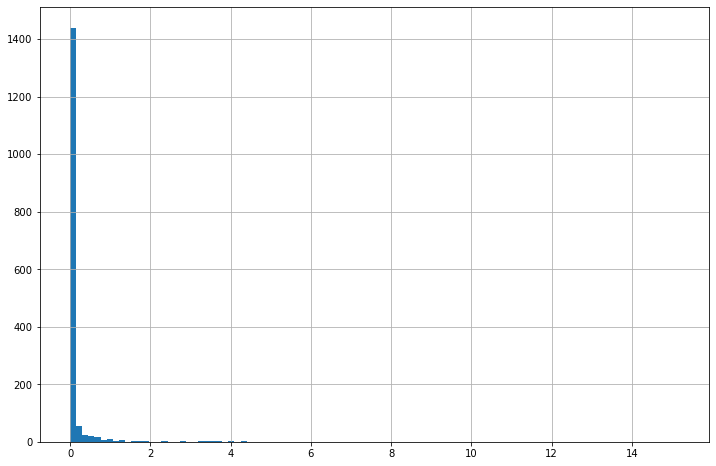

In [169]:
df_lake = df_cat.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not si10Fr_change_is_significant')
surface_noise_numbers(df_lake)

#### Lake ground

In [89]:
df_lake_ground = df_cat.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')


Median: 0.022453751415014267
Mean: 0.5525061


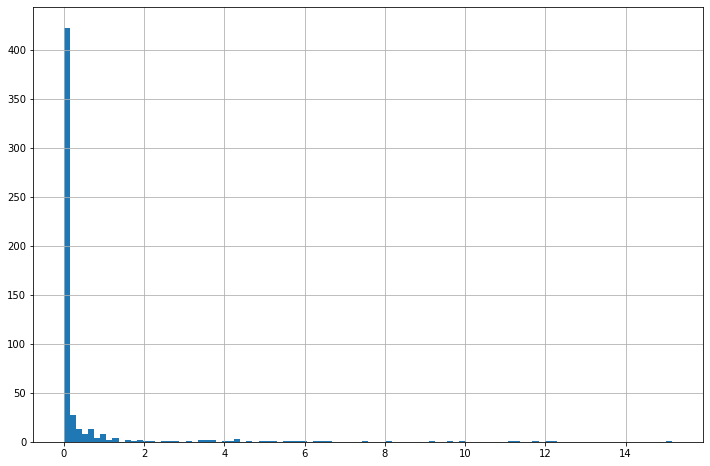

In [91]:
surface_noise_numbers(df_lake_ground)

#### Vegetation

In [92]:
df_vegetation = df_cat.query('cvhFr_change_is_significant & not clFr_change_is_significant')


Median: 0.05315713584423065
Mean: 0.1788691


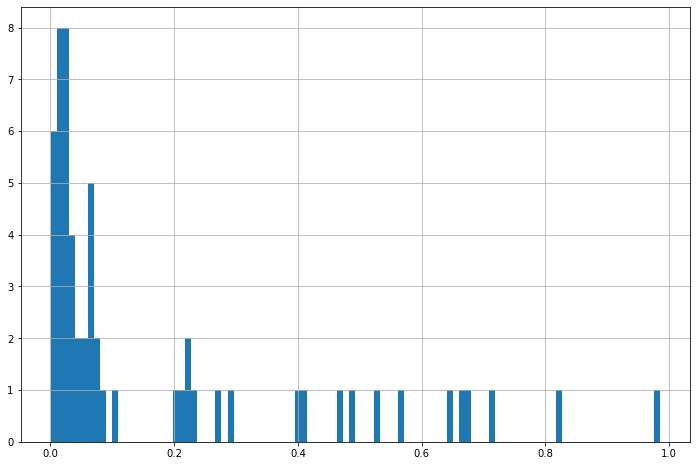

In [93]:
surface_noise_numbers(df_vegetation)

#### Glacier

Numer of grid points: 1057
Median: 0.055565495043992996
Mean: 0.15235907


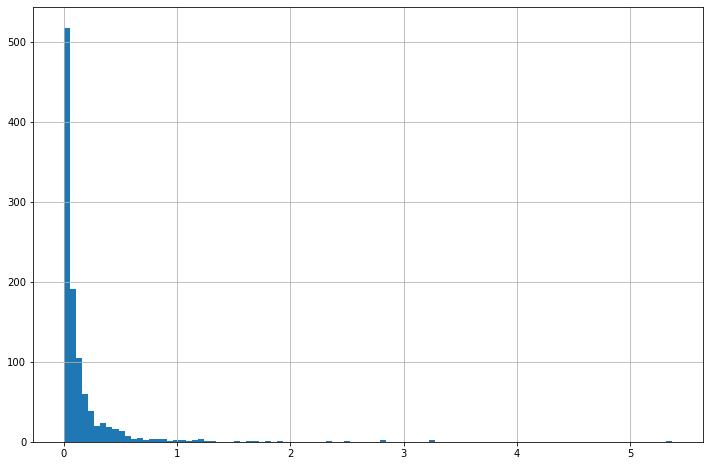

In [97]:
df_glacier = df_cat.query('si10Fr_change_is_significant')
surface_noise_numbers(df_glacier)

#### Deep dive on individual bad points

In [170]:
lake_natron = df_lake.query('latitude_ERA == -2.3887580539270044 & longitude_ERA == 36.0000')
lake_natron_northern_edge =df_lake.query('latitude_ERA == -2.10772769472398 & longitude_ERA == 36.0000') 
lake_blanche =df_lake.query('latitude_ERA ==  -29.367671674745356 & longitude_ERA == 139.6875') 
salt_lake_city =df_lake.query('latitude_ERA ==  41.17094491970063 & longitude_ERA ==  -113.39999999999998') 
farah_province =df_lake.query('latitude_ERA ==  31.615914311651938 & longitude_ERA == 61.120000000000005') 
gujarat_province =df_lake.query('latitude_ERA ==  24.028095261448925 & longitude_ERA ==  69.0') 
toshka_lakes =df_lake.query('latitude_ERA ==  23.18500423251539 & longitude_ERA ==  30.900000000000006') 
all_northern_canada_points = df_lake.query('50.0 < latitude_ERA & -130 < longitude_ERA < -80')

caspain_1 = df_lake.query('latitude_ERA ==  46.22948997297545 & longitude_ERA ==   49.125')
caspain_2 = df_lake.query('latitude_ERA ==  46.22948997297545 & longitude_ERA ==    49.5')
caspain_3 = df_lake.query('latitude_ERA ==  46.51052023808231 & longitude_ERA ==    49.5')
caspain_4 = df_lake.query('latitude_ERA ==  47.072580762649004 & longitude_ERA ==    51.599999999999994')

caspian_edge = pd.concat([caspain_1,caspain_2,caspain_3,caspain_4])

bering_glacier = df_glacier.query('latitude_ERA == 60.280999861571715   & longitude_ERA ==    -143.4666666666667')
juncal_glacier = df_glacier.query('latitude_ERA == -33.021065936911214   & longitude_ERA ==    -70.07999999999998')


In [171]:
selected_dfs = dict({'lake_natron':lake_natron,
                     'lake_natron_northern_edge':lake_natron_northern_edge,
                     'lake_blanche':lake_blanche,
                     'salt_lake_city':salt_lake_city,
                     'farah_province':farah_province,
                     'gujarat_province':gujarat_province,
                     'toshka_lakes':toshka_lakes,
                     'all_northern_canada_points':all_northern_canada_points,
                     'caspian_edge':caspian_edge,
                     'bering_glacier':bering_glacier,
                     'juncal_glacier':juncal_glacier})

lake_natron
Numer of grid points: 1
Median: 0.009976662695407867
Mean: 0.009976663
************************
lake_natron_northern_edge
Numer of grid points: 1
Median: 0.01995065063238144
Mean: 0.01995065
************************
lake_blanche
Numer of grid points: 1
Median: 0.054922495037317276
Mean: 0.054922495
************************
salt_lake_city
Numer of grid points: 1
Median: 0.12763968110084534
Mean: 0.12763968
************************
farah_province
Numer of grid points: 1
Median: 0.00037971368874423206
Mean: 0.0003797137
************************
gujarat_province
Numer of grid points: 1
Median: 11.763381958007812
Mean: 11.763382
************************
toshka_lakes
Numer of grid points: 1
Median: 0.7704178690910339
Mean: 0.77041787
************************
all_northern_canada_points
Numer of grid points: 756
Median: 0.003363757859915495
Mean: 0.0066983574
************************
caspian_edge
Numer of grid points: 4
Median: 0.03296256065368652
Mean: 0.03826432
*****************

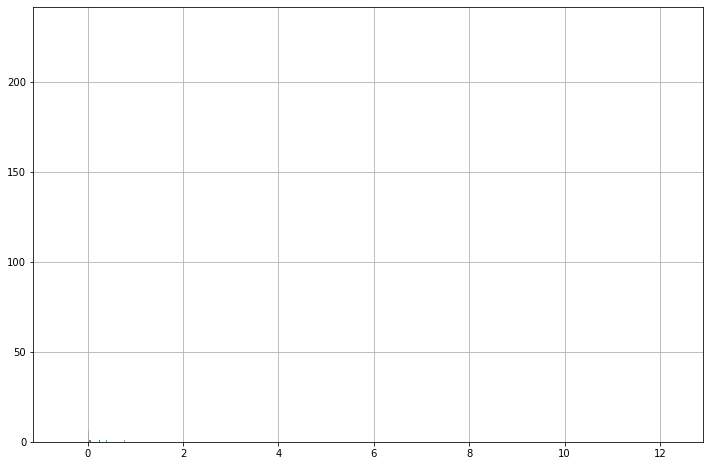

In [163]:
for key,value in selected_dfs.items():
    print(key)
    surface_noise_numbers(value)
    print("************************")

In [164]:
bering_glacier

,latitude_ERA,longitude_ERA,prediction_error_1,prediction_error_2,prediction_error_3,V15_clFr,V15_cvhFr,V15_cvlFr,V15_dl,V15_oceanFr,...,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance
134395,60.281,-143.466667,4.113899,3.638883,4.880559,0.070561,0.010551,0.104417,1.946289,0.0,...,47.130859,False,False,False,False,True,True,True,0001011,0.392528


In [172]:
gujarat_province

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,V15_clFr,...,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance
71526,24.028095,69.0,313.741486,5.290875,309.216736,5.206067,309.648285,11.188568,302.657593,0.59056,...,0.267944,True,False,False,False,False,True,True,1001001,11.763382


In [146]:
juncal_glacier['longitude_ERA'].to_numpy()[0]

-70.07999999999998